In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## reading the data
data=pd.read_csv("advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
x=data.iloc[:,0]
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
5        8.7
6       57.5
7      120.2
8        8.6
9      199.8
10      66.1
11     214.7
12      23.8
13      97.5
14     204.1
15     195.4
16      67.8
17     281.4
18      69.2
19     147.3
20     218.4
21     237.4
22      13.2
23     228.3
24      62.3
25     262.9
26     142.9
27     240.1
28     248.8
29      70.6
       ...  
170     50.0
171    164.5
172     19.6
173    168.4
174    222.4
175    276.9
176    248.4
177    170.2
178    276.7
179    165.6
180    156.6
181    218.5
182     56.2
183    287.6
184    253.8
185    205.0
186    139.5
187    191.1
188    286.0
189     18.7
190     39.5
191     75.5
192     17.2
193    166.8
194    149.7
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [7]:
x=data.iloc[:,0:3].values
#print(x)
y=data.iloc[:,3:].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [6]:
from sklearn.linear_model import LinearRegression
a=LinearRegression()

In [9]:
a.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_predict=a.predict(x)
y_predict

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872],
       [ 7.0322992 ],
       [17.28512918],
       [10.57712073],
       [ 8.82630048],
       [18.43436638],
       [20.81929952],
       [12.82365674],
       [23.22495716],
       [ 9.95168206],
       [14.16607293],
       [18.10076728],
       [14.7405382 ],
       [ 6.4891503 ],
       [16.5459329 ],
       [ 8.14651887],
       [15.6100386 ],
       [14.98951429],
       [17.05167344],
       [19.41053803],
       [ 9.14402389],
       [21.6339338 ],
       [11.3460929 ],
       [ 7.63888314],
       [18.86426829],
       [ 7.57483051],
       [17.00682618],
       [23.40590052],
       [15.62347779],
       [ 9.90868103],
       [20.44761039],
       [16.37766467],
       [17.2959832 ],
       [21.59580326],
       [13.96385684],
       [ 8.88787996],
       [15

In [11]:
a.predict([[180.8,10.8,58.4]])

array([[13.18867186]])

In [12]:
a.predict([[23.8,67.8,56.2]])

array([[16.75211597]])

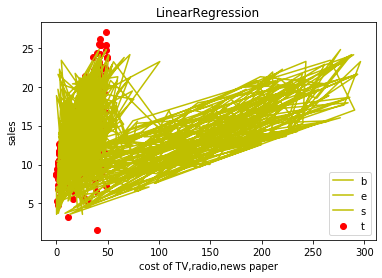

In [28]:
plt.scatter(data["radio"],y,c='r',label="Before prediction")
plt.plot(x,y_predict,c='y',label="After prediction with LinearRegression")
plt.xlabel("cost of TV,radio,news paper")
plt.ylabel("sales")
plt.title("LinearRegression")
plt.legend("best")
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures()

In [35]:
x_poly=poly_feat.fit_transform(x)
poly_feat.fit(x_poly,y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [36]:
a.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_predictions=a.predict(x_poly)

In [38]:
a.coef_

array([[ 0.00000000e+00,  5.16525487e-02,  2.10742970e-02,
         6.88373531e-03, -1.09702663e-04,  1.10525949e-03,
        -4.55155391e-05,  1.11997015e-04,  8.26605896e-05,
         1.19125650e-05]])

### Ridge regression---reguralisation(alpha=0<alpha<infinity
     1.ridge regression:over fitting
     2.lasso regression:under fitting

In [44]:
from sklearn.linear_model import Ridge

In [45]:
r=Ridge()

In [53]:
x2=5*np.random.rand(100,1)
y2=0.5*x2+np.random.rand(100,1)
x2.shape
print("x2",x2)
print("y2",y2)

x2 [[4.3188796 ]
 [4.70686531]
 [4.53258702]
 [0.31505414]
 [3.40576438]
 [2.01379677]
 [0.74960551]
 [0.09092454]
 [4.13255973]
 [0.72542525]
 [2.28612925]
 [3.32308665]
 [3.90416859]
 [4.91119471]
 [2.48192897]
 [4.82525229]
 [4.37439046]
 [1.09578834]
 [4.68368254]
 [3.20089388]
 [1.99881159]
 [1.99284096]
 [2.65975973]
 [1.36346748]
 [1.93969983]
 [2.01926128]
 [3.27302735]
 [4.58210316]
 [0.70874638]
 [2.81054072]
 [3.57226244]
 [4.05298297]
 [3.60205654]
 [2.70347955]
 [0.31301583]
 [4.46584989]
 [2.2650273 ]
 [3.80197378]
 [1.60975827]
 [3.87227129]
 [1.98669124]
 [3.28558682]
 [1.23828684]
 [2.14041694]
 [4.27631187]
 [2.84632519]
 [0.09423971]
 [3.46058811]
 [4.79131826]
 [0.76691605]
 [3.11741336]
 [2.59318616]
 [0.46317178]
 [2.46102096]
 [1.78028366]
 [0.1567231 ]
 [0.09952342]
 [4.26901989]
 [4.21761085]
 [1.25457789]
 [2.80391211]
 [4.505305  ]
 [4.15655716]
 [3.2736683 ]
 [1.51059484]
 [1.07642594]
 [2.85135553]
 [1.9087891 ]
 [3.87792135]
 [4.50071125]
 [4.74051286]
 [1

In [49]:
y2.shape

(100, 1)

In [56]:
r=Ridge(alpha=1,solver="cholesky")
r

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [57]:
r.fit(x2,y2)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [62]:
r.predict([[0.89]])

array([[0.92193506]])